# Titanic Survival Analysis

## Background

The objective of this analysis is to determine the factors that contributed to higher likelihood of survival of passengers traveling on board the [RMS Titanic](https://en.wikipedia.org/wiki/Titanic), the famous ship that sunk on April 15, 1912.

We'll also look at some attributes of survivors that may or may not have distuingished them from non-survivors.

The dataset for this analysis was obtained from [this kaggle page](https://www.kaggle.com/datasets/yasserh/titanic-dataset). Each row of the dataset represents a distinct passenger.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
titanic_passengers = pd.read_csv("Titanic-Dataset.csv")

In [61]:
titanic_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


RMS Titanic had an estimated [2,224 passengers](https://en.wikipedia.org/wiki/Titanic). This dataset only has 891 entries, making it incomplete. Nonetheless, we proceed with the analysis to see if we can uncover any patterns.

Let's have a quick look at each column:

- `PassengerId`: A unique identifier for each passenger
- `Survived`: Indicates whether the passenger survived or not. If `1`, the passenger survived. If `0`, they didn't survive.
- `Pclass`: The type of ticket purchased (1st class most luxurious, 3rd class least)
- `Name`: The passenger's name
- `Sex`: The passenger's gender
- `Age`: The passenger's age, in years
- `SibSp`: The number of siblings/spouses of the passenger on board
- `Parch`: The number of parents/children of the passenger on board
- `Ticket`: The passenger's ticket number
- `Fare`: The amount the passenger paid for the ticket
- `Cabin`: The passenger's cabin number on board
- `Embarked`: The station which the passenger embarked from. `S` - Southampton, `C` - Cherbourg, `Q` - Queenstown

## Exploring the Data

Before proceeding with the analysis, I want to first know if the column `Pclass` can be construed as a broad indicator of socioeconomic class. To do this, I check the average fare price for each of the three classes.

In [62]:
grouped_by_class = titanic_passengers.groupby("Pclass", as_index=False)["Fare"].mean()

<Axes: xlabel='Pclass', ylabel='Fare'>

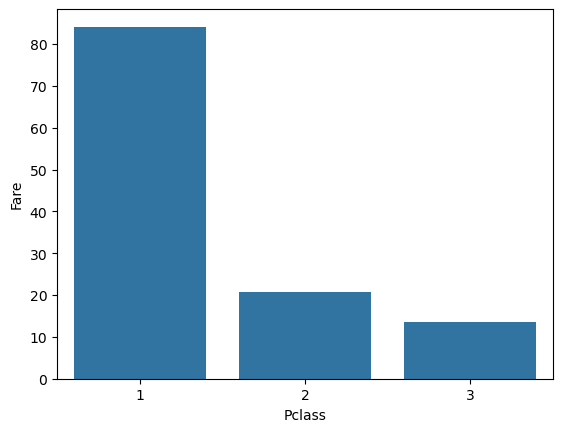

In [63]:
sns.barplot(
    data=grouped_by_class,
    x="Pclass",
    y="Fare"
)

As one might expect, first class tickets are the most expensive, while third class are the least. While it's possible for wealthy people to have bought third class tickets, and for poor people to have bought first class tickets, I'll assume that most people bought the tickets that their income bracket would allow for. Therefore, for the rest of this analysis we'll proceed with the assumption that class of ticket purchased is a rough measure of socioeconomic class in society generally.

To get a feel for the data, I like to start by exploring the distinct values in each column. I write a helper function to do exactly this, and explore each column one-by-one.

In [64]:
titanic_passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
def get_sorted_unique(col_name):
    return np.sort(titanic_passengers[col_name].dropna().unique())

In [66]:
get_sorted_unique("Embarked")

array(['C', 'Q', 'S'], dtype=object)

## Analysis

### Survival Rate by Class

As a first, let's see if we can determine the rate of survival for each of the first, second, and third classes. That is to say, we determine the proportions of people in each class that ended up surviving.

In [67]:
grouped_by_class = titanic_passengers.groupby("Pclass")

In [68]:
percentage_survival_by_class = (grouped_by_class["Survived"].sum() / grouped_by_class["PassengerId"].count()) * 100

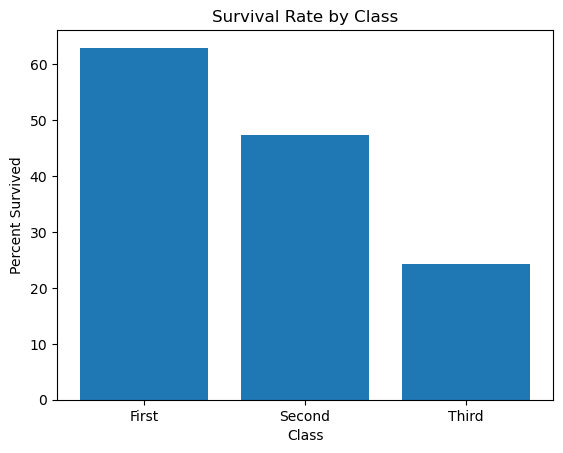

In [69]:
plt.bar(["First", "Second", "Third"], percentage_survival_by_class)
plt.xlabel("Class")
plt.ylabel("Percent Survived")
plt.title("Survival Rate by Class")
plt.show()

As one might expect, belonging to a higher socioeconomic class leads to higher odds of survival. Over half of all first class members survived, but only about 20% of third class members did. This may be attributed to a disproportionate amount of resources being spent to save members of higher classes.

### Survival Rate by Gender

Now, let's determine survival rates for men vs women on board.

In [70]:
grouped_by_gender = titanic_passengers.groupby("Sex")

In [71]:
percentage_survival_by_gender = (grouped_by_gender["Survived"].sum() / grouped_by_gender["PassengerId"].count()) * 100

In [72]:
percentage_survival_by_gender

Sex
female    74.203822
male      18.890815
dtype: float64

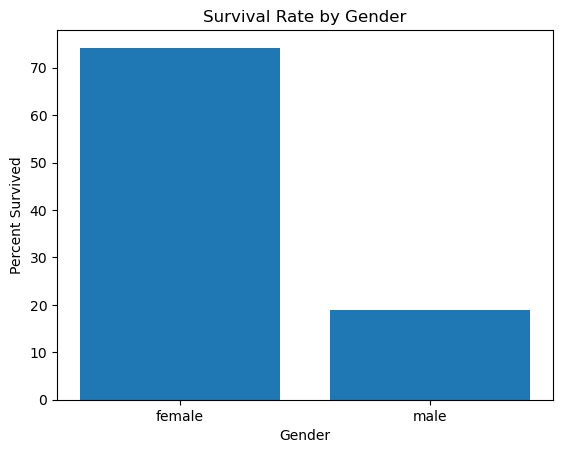

In [73]:
plt.bar(percentage_survival_by_gender.index, percentage_survival_by_gender)
plt.xlabel("Gender")
plt.ylabel("Percent Survived")
plt.title("Survival Rate by Gender")
plt.show()

### Survival Rate by Gender and Class

Let's now group people based on both class and gender to analyze survival rates with a higher degree of specificity.

In [74]:
grouped_by_gender_and_class = titanic_passengers.groupby(["Sex", "Pclass"], as_index=False)

In [75]:
percent_survival_rates = grouped_by_gender_and_class["Survived"].sum().merge(grouped_by_gender_and_class["PassengerId"].count(), on=["Sex", "Pclass"])

In [76]:
percent_survival_rates["survival_rate"] = (percent_survival_rates["Survived"] / percent_survival_rates["PassengerId"]) * 100

In [77]:
percent_survival_rates

,Sex,Pclass,Survived,PassengerId,survival_rate
0,female,1,91,94,96.808511
1,female,2,70,76,92.105263
2,female,3,72,144,50.000000
3,male,1,45,122,36.885246
4,male,2,17,108,15.740741
5,male,3,47,347,13.544669


In [78]:
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='survival_rate'>

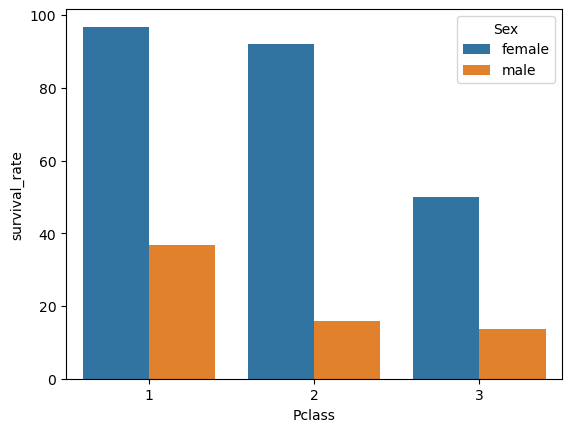

In [79]:
sns.barplot(
    data=percent_survival_rates,
    x="Pclass",
    y="survival_rate",
    hue="Sex"
)

We see that women with first class tickets was the most likely group to survive, while men with third class tickets was the least.

### Survival Rates based on existence of family on board

We now check to see if having family on board meant you were more likely to survive.

In [80]:
has_family = (titanic_passengers["SibSp"] > 0) | (titanic_passengers["Parch"] > 0)

In [81]:
grouped_by_family = titanic_passengers.groupby(has_family)

In [82]:
df = pd.DataFrame(
    {"has_family": (False, True)},
)

In [83]:
def get_survival_rate(groupby_obj):
    return round((groupby_obj["Survived"].sum() / groupby_obj["PassengerId"].count()) * 100, 2)

In [84]:
df["survival_rate"] = get_survival_rate(grouped_by_family)

In [85]:
df

,has_family,survival_rate
0,False,30.35
1,True,50.56


<Axes: xlabel='has_family', ylabel='survival_rate'>

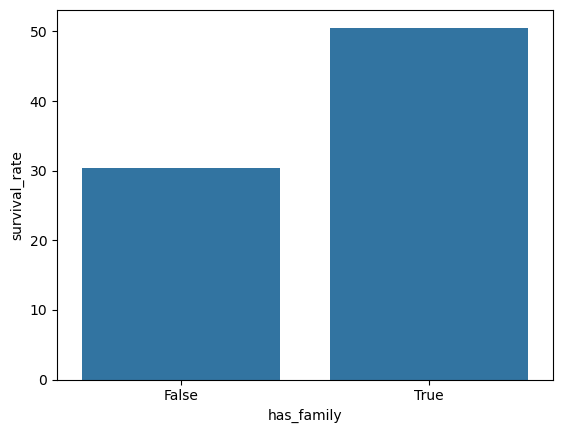

In [86]:
sns.barplot(
    data=df,
    x="has_family",
    y="survival_rate"
)

People with families on board were more likely to survive.

### Average Age of Survivors vs Non-Survivors

In [87]:
titanic_passengers.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

While survivors were on average younger than non-survivors, the age difference is barely significant.

### Average Fare for Survivors vs Non-Survivors

In [88]:
titanic_passengers.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Survivors on average paid over twice as much for their tickets, which makes sense given that first class passengers were the likeliest to survive.